In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
from scipy import stats


In [35]:
usda_expenditures_df = pd.read_csv ('DataSets/USDA_food_expenditures.csv')
usda_expenditures_df

,Year,Grocery stores,Convenience stores,Other food stores,Warehouse clubs and supercenters,Mass merchandisers,Other stores and foodservice,Mail order and home delivery,"Direct selling by farmers, manufacturers, and wholesalers",Home production and donations,...,Food furnished and donated,Total FAFH,Liquor stores,Food stores,"Other AAH sales, NEC",Total AAH,Eating and drinking places,Hotels and motels.1,"Other AAFH, NEC",Total AAFH
0,2010,"191,025.02","5,470.74","7,847.84","68,814.38","5,957.55","32,063.86","9,158.44","1,864.59","1,018.60",...,"19,103.87","296,334.63","21,161.22","12,464.09","12,542.93","46,168.24","21,624.65","2,344.63","2,885.49","26,854.76"
1,2011,"190,212.34","5,834.22","7,901.61","68,566.68","5,650.26","34,453.36","9,136.80","1,873.35",788.66,...,"20,004.54","307,136.66","21,609.91","13,467.93","13,824.67","48,902.51","22,555.77","2,530.74","2,862.78","27,949.29"
2,2012,"189,895.61","6,077.42","8,134.27","69,989.74","5,428.89","36,070.21","9,183.48","1,891.92",744.83,...,"19,847.30","313,997.84","22,460.14","14,145.81","14,192.66","50,798.62","23,475.21","2,703.93","2,875.51","29,054.65"
3,2013,"191,643.73","6,274.09","8,072.98","71,591.63","5,155.64","35,335.72","9,379.77","2,197.78",903.4,...,"19,783.22","318,730.75","23,053.97","14,281.17","14,192.84","51,527.99","23,243.29","2,789.16","3,072.69","29,105.15"
4,2014,"195,601.92","6,206.57","8,294.76","72,245.16","4,941.01","35,061.20","9,593.59","2,491.92",908,...,"19,760.71","326,519.81","24,001.16","14,762.47","14,313.31","53,076.94","24,089.04","2,905.01","3,151.70","30,145.75"
5,2015,"198,068.14","6,026.13","8,351.70","72,802.56","4,773.51","32,667.55","9,540.48","2,737.27","1,040.84",...,"19,827.96","339,251.06","25,088.17","15,014.51","13,498.65","53,601.33","25,281.05","3,015.70","3,269.69","31,566.44"
6,2016,"203,839.44","6,479.23","8,690.63","75,139.42","4,504.84","33,198.54","10,124.48","2,782.15","1,055.08",...,"20,088.79","346,656.69","26,185.12","15,209.04","13,416.46","54,810.62","26,219.16","3,124.85","3,363.31","32,707.32"
7,2017,"211,998.16","6,799.59","8,644.19","77,865.65","4,353.74","35,162.99","10,950.58","2,842.29","1,026.77",...,"20,259.06","354,743.63","26,999.11","15,699.23","14,069.22","56,767.57","27,089.50","3,161.92","3,473.89","33,725.30"
8,2018,"215,937.89","7,473.80","8,831.06","80,639.73","4,391.57","37,065.21","11,946.72","2,866.92","1,021.78",...,"20,455.12","364,133.72","28,025.79","16,060.63","14,835.62","58,922.04","28,097.65","3,214.28","3,550.30","34,862.23"
9,2019,"219,782.70","7,595.39","8,699.02","81,938.36","4,234.20","37,211.61","13,022.36","3,381.70","1,071.53",...,"20,406.25","368,650.84","28,433.27","16,247.24","14,953.87","59,634.38","28,555.67","3,302.81","3,766.23","35,624.71"


In [127]:
new_usda_df = usda_expenditures_df.rename(columns={'Grocery stores':'Grocery','Convenience stores':'Convenience',
                                                   'Other food stores':'Other Stores', 'Warehouse clubs and supercenters':'Warehouse Clubs',
                                                  'Mass merchandisers':'Merchandisers', 'Other stores and foodservice': 'Other Foodservice',
                                                  'Mail order and home delivery':'Mail & Delivery', 'Direct selling by farmers, manufacturers, and wholesalers':'Direct Selling',
                                                  'Home production and donations':'Home Production','Food furnished and donated':'Furnished & Donated', 'Other AAH sales, NEC':'Other Sales'})

new_usda_df

,Year,Grocery,Convenience,Other Stores,Warehouse Clubs,Merchandisers,Other Foodservice,Mail & Delivery,Direct Selling,Home Production,...,Furnished & Donated,Total FAFH,Liquor stores,Food stores,Other Sales,Total AAH,Eating and drinking places,Hotels and motels.1,"Other AAFH, NEC",Total AAFH
0,2010,"191,025.02","5,470.74","7,847.84","68,814.38","5,957.55","32,063.86","9,158.44","1,864.59","1,018.60",...,"19,103.87","296,334.63","21,161.22","12,464.09","12,542.93","46,168.24","21,624.65","2,344.63","2,885.49","26,854.76"
1,2011,"190,212.34","5,834.22","7,901.61","68,566.68","5,650.26","34,453.36","9,136.80","1,873.35",788.66,...,"20,004.54","307,136.66","21,609.91","13,467.93","13,824.67","48,902.51","22,555.77","2,530.74","2,862.78","27,949.29"
2,2012,"189,895.61","6,077.42","8,134.27","69,989.74","5,428.89","36,070.21","9,183.48","1,891.92",744.83,...,"19,847.30","313,997.84","22,460.14","14,145.81","14,192.66","50,798.62","23,475.21","2,703.93","2,875.51","29,054.65"
3,2013,"191,643.73","6,274.09","8,072.98","71,591.63","5,155.64","35,335.72","9,379.77","2,197.78",903.4,...,"19,783.22","318,730.75","23,053.97","14,281.17","14,192.84","51,527.99","23,243.29","2,789.16","3,072.69","29,105.15"
4,2014,"195,601.92","6,206.57","8,294.76","72,245.16","4,941.01","35,061.20","9,593.59","2,491.92",908,...,"19,760.71","326,519.81","24,001.16","14,762.47","14,313.31","53,076.94","24,089.04","2,905.01","3,151.70","30,145.75"
5,2015,"198,068.14","6,026.13","8,351.70","72,802.56","4,773.51","32,667.55","9,540.48","2,737.27","1,040.84",...,"19,827.96","339,251.06","25,088.17","15,014.51","13,498.65","53,601.33","25,281.05","3,015.70","3,269.69","31,566.44"
6,2016,"203,839.44","6,479.23","8,690.63","75,139.42","4,504.84","33,198.54","10,124.48","2,782.15","1,055.08",...,"20,088.79","346,656.69","26,185.12","15,209.04","13,416.46","54,810.62","26,219.16","3,124.85","3,363.31","32,707.32"
7,2017,"211,998.16","6,799.59","8,644.19","77,865.65","4,353.74","35,162.99","10,950.58","2,842.29","1,026.77",...,"20,259.06","354,743.63","26,999.11","15,699.23","14,069.22","56,767.57","27,089.50","3,161.92","3,473.89","33,725.30"
8,2018,"215,937.89","7,473.80","8,831.06","80,639.73","4,391.57","37,065.21","11,946.72","2,866.92","1,021.78",...,"20,455.12","364,133.72","28,025.79","16,060.63","14,835.62","58,922.04","28,097.65","3,214.28","3,550.30","34,862.23"
9,2019,"219,782.70","7,595.39","8,699.02","81,938.36","4,234.20","37,211.61","13,022.36","3,381.70","1,071.53",...,"20,406.25","368,650.84","28,433.27","16,247.24","14,953.87","59,634.38","28,555.67","3,302.81","3,766.23","35,624.71"


In [164]:
total_food_spendy = new_usda_df.iloc[0,[10,20]].values

total_food_spendx = new_usda_df.iloc[0,[10,20]].index

total_food_spendy = [float(strdollar.replace(',', '')) for strdollar in total_food_spendy]

total_food_spendx



Index(['Total FAH', 'Total FAFH'], dtype='object')

<IPython.core.display.Javascript object>


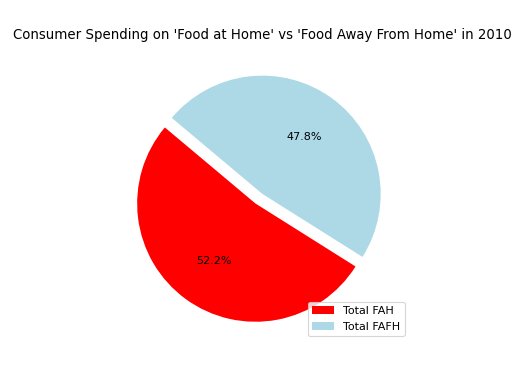

In [165]:
colors = ["red", "lightblue"]
explode = (0.1, 0)
pie2010=plt.pie(total_food_spendy, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food at Home' vs 'Food Away From Home' in 2010")
plt.legend(total_food_spendx, loc="lower right")

In [114]:
# grabbing the 2010 food at home data

y_axis = new_usda_df.iloc[0,1:10].values

x_axis = new_usda_df.iloc[0,1:10].index

y_axis = [float(strdollar.replace(',', '')) for strdollar in y_axis]

y_axis

[191025.02,
 5470.74,
 7847.84,
 68814.38,
 5957.55,
 32063.86,
 9158.44,
 1864.59,
 1018.6]

In [67]:
x_axis


Index(['Grocery', 'Convenience', 'Other', 'Warehouse Clubs', 'Merchandisers',
       'Other Foodservice', 'Mail & Delivery', 'Direct Selling',
       'Home Production'],
      dtype='object')

<IPython.core.display.Javascript object>


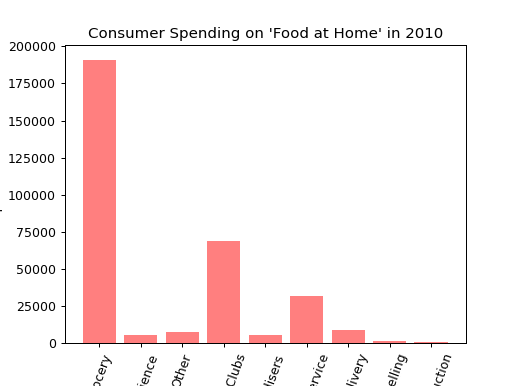

Text(0, 0.5, 'Dollars Spent (Millions)')

In [153]:
# Bar Graph for 2010 food at home data

bar2010=plt.bar(x_axis, y_axis, color='r', alpha=0.5)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food at Home' in 2010")
plt.xlabel("Food Purchase Location")
plt.ylabel("Dollars Spent (Millions)")

<IPython.core.display.Javascript object>


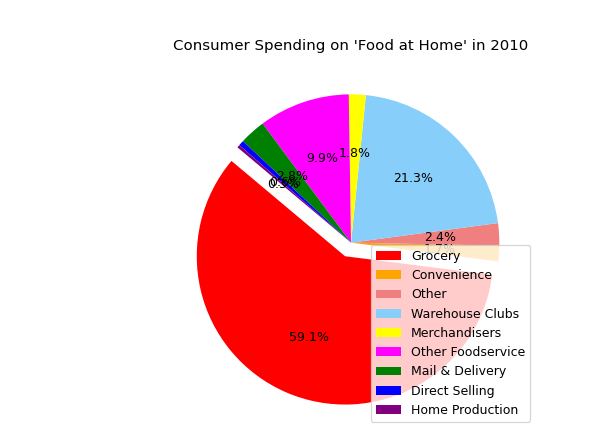

In [154]:
# Pie Graph for 2010 food at data

colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "magenta", "green", "blue", "purple"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
pie2010=plt.pie(y_axis, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food at Home' in 2010")
plt.legend(x_axis, loc="lower right")



In [183]:
# grabbing the 2010 alcohol at home data

y_axisA2010 = new_usda_df.iloc[0,21:24].values

x_axisA2010 = new_usda_df.iloc[0,21:24].index

y_axisA2010 = [float(strdollar.replace(',', '')) for strdollar in y_axisA2010]



<IPython.core.display.Javascript object>


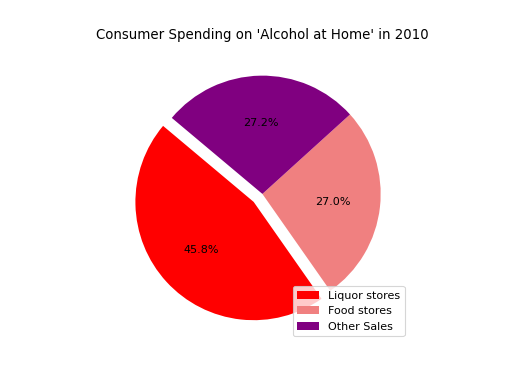

In [187]:
# Pie Graph for 2010 alcohol at home data

colors = ["red", "lightcoral", "purple"]
explode = (0.1, 0, 0)
pie2010 = plt.pie(y_axisA2010, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Alcohol at Home' in 2010")
plt.legend(x_axisA2010, loc="lower right")

In [155]:
# grabbing the 2019 food at home data

y_axis2019 = new_usda_df.iloc[9,1:10].values

x_axis2019 = new_usda_df.iloc[9,1:10].index

y_axis2019 = [float(strdollar.replace(',', '')) for strdollar in y_axis2019]


<IPython.core.display.Javascript object>


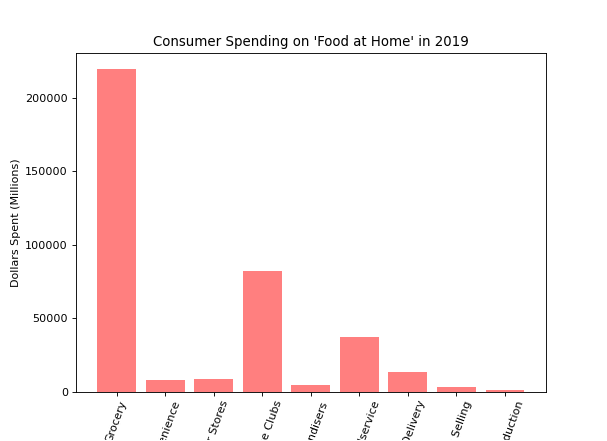

Text(0, 0.5, 'Dollars Spent (Millions)')

In [166]:
# Bar Graph for 2019 food at home data

plt.bar(x_axis2019, y_axis2019, color='r', alpha=0.5)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food at Home' in 2019")
plt.xlabel("Food Purchase Location")
plt.ylabel("Dollars Spent (Millions)")

<IPython.core.display.Javascript object>


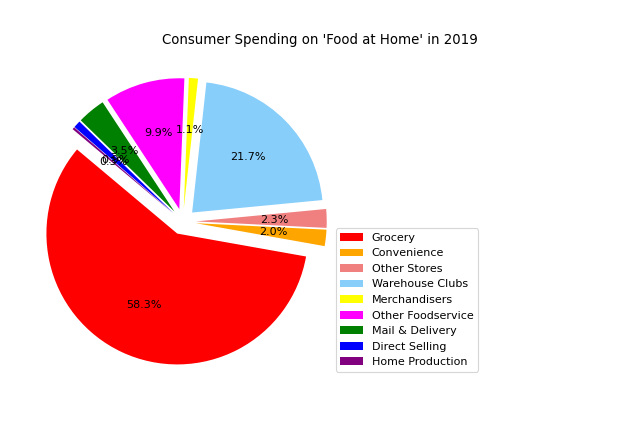

In [167]:
# Pie Graph for 2019 food at data

colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "magenta", "green", "blue", "purple"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
pie2019 = plt.pie(y_axis2019, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food at Home' in 2019")
plt.legend(x_axis2019, loc="lower right")


In [168]:
# grabbing the 2019 alcohol at home data

y_axisA2019 = new_usda_df.iloc[9,21:24].values

x_axisA2019 = new_usda_df.iloc[9,21:24].index

y_axisA2019 = [float(strdollar.replace(',', '')) for strdollar in y_axisA2019]



<IPython.core.display.Javascript object>


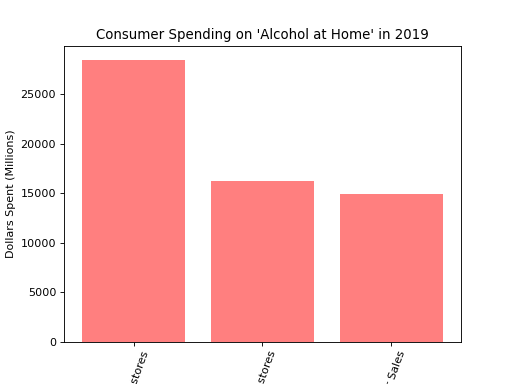

Text(0, 0.5, 'Dollars Spent (Millions)')

In [173]:
# Bar Graph for 2019 alcohol at home data

plt.bar(x_axisA2019, y_axisA2019, color='r', alpha=0.5)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Alcohol at Home' in 2019")
plt.xlabel("Alcohol Purchase Location")
plt.ylabel("Dollars Spent (Millions)")

<IPython.core.display.Javascript object>


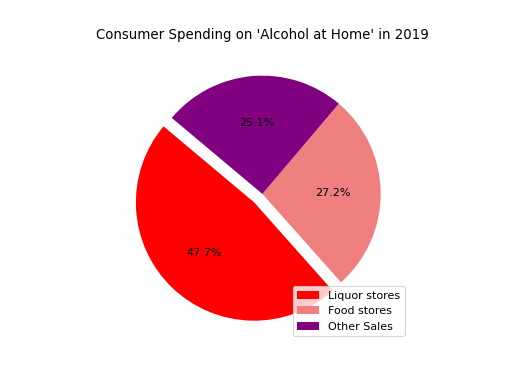

In [188]:
# Pie Graph for 2019 alcohol at home data

colors = ["red", "lightcoral", "purple"]
explode = (0.1, 0, 0)
pie2019 = plt.pie(y_axisA2019, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Alcohol at Home' in 2019")
plt.legend(x_axisA2019, loc="lower right")


In [150]:
# Grabbing data for 2019 food and alcohol at home spending number
y_axisfa2019 = new_usda_df.iloc[9,[1,2,3,4,5,6,7,8,9,21,22,23]].values

x_axisfa2019 = new_usda_df.iloc[9,[1,2,3,4,5,6,7,8,9,21,22,23]].index

y_axisfa2019 = [float(strdollar.replace(',', '')) for strdollar in y_axisfa2019]

<IPython.core.display.Javascript object>


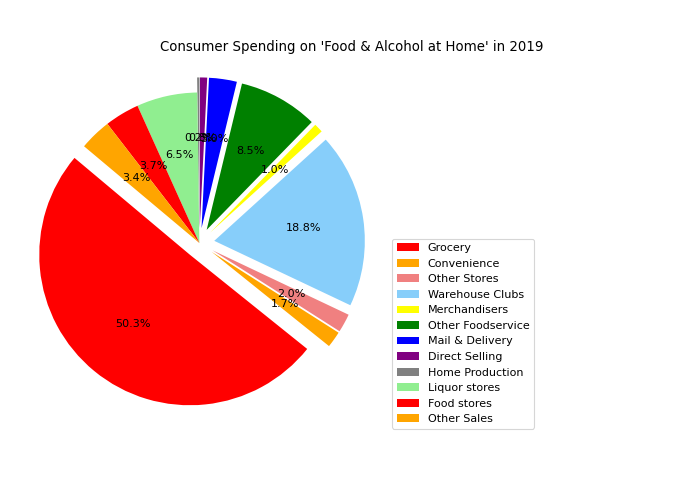

In [180]:
# Pie Graph for 2019 food and alcohol at home spending data

colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "green", "blue", "purple", "grey", "lightgreen"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0)
pie2019 = plt.pie(y_axisfa2019, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food & Alcohol at Home' in 2019")
plt.legend(x_axisfa2019, loc="lower right")

In [170]:
# Grabbing data for 2010 food and alcohol at home spending number
y_axisfa2010 = new_usda_df.iloc[0,[1,2,3,4,5,6,7,8,9,21,22,23]].values

x_axisfa2010 = new_usda_df.iloc[0,[1,2,3,4,5,6,7,8,9,21,22,23]].index

y_axisfa2010 = [float(strdollar.replace(',', '')) for strdollar in y_axisfa2010]

<IPython.core.display.Javascript object>


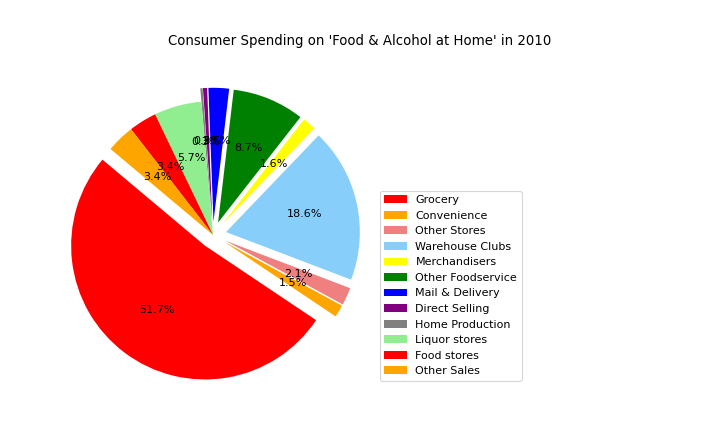

In [179]:
# Pie Graph for 2010 food and alcohol at home spending data

colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "green", "blue", "purple", "grey", "lightgreen"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0,)
pie2010 = plt.pie(y_axisfa2010, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow= False, startangle=140)
plt.xticks(rotation=70)
# Set a Title and labels
plt.title("Consumer Spending on 'Food & Alcohol at Home' in 2010")
plt.legend(x_axisfa2010, loc="lower right")